In [4]:
from recognizer.lp_recognizer import LPRecognizer
from ultralytics import YOLO
import cv2 as cv
import easyocr

ocr = easyocr.Reader(['en'])
lpr_model = YOLO("alpr_v8n_100ep.pt")
lp_recognizer = LPRecognizer(lpr_model, lpr_reader=ocr)

In [5]:
frame = cv.imread("datasets/roboflow-v4/valid/images/006f44b210255845_jpg.rf.01e5b050ed1ad4ef918d3927ac6ab29a.jpg")


0: 640x640 1 License_Plate, 7.6ms
Speed: 1.8ms preprocess, 7.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
VVJ 0ob


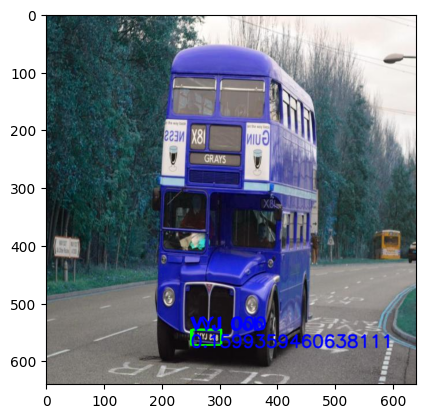

In [7]:
import matplotlib.pyplot as plt
result = lp_recognizer.recognize_frame(frame)
width, height = frame.shape[1], frame.shape[0]
for key in result.lps:
    lpd = result.lps[key]
    bbox = lpd.box
    xt, yt, xb, yb = bbox.xtop, bbox.ytop, bbox.xbottom, bbox.ybottom
    p1 = (int(xt * width), int(yt * height))
    p2 = (int(xb * width), int(yb * height))
    print(lpd.plate)
    cv.rectangle(frame, p1, p2, (0, 255, 0), 2)
    cv.putText(frame, lpd.plate, p1, cv.FONT_HERSHEY_SIMPLEX, 0.2, (0, 0, 255), 2, cv.LINE_AA)
    cv.putText(frame, str(lpd.plate_confidence), (p1[0], p1[1] - 30), cv.FONT_HERSHEY_SIMPLEX, 0.2, (0, 0, 255), 2, cv.LINE_AA)
plt.imshow(frame)